In [1]:
import numpy as np
import pandas as pd
# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from google.cloud import bigquery
from bq_helper import BigQueryHelper
%load_ext google.cloud.bigquery
import os
%matplotlib inline


# For visualization
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6, brewer
from bokeh.transform import factor_cmap

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="My Project-bbdce7b1712b.json"

bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")


# ANALYZE ONLY FROM JAN 2003 TO DEC 2017

# Analyze CO Daily

In [2]:

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_CO
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_co_Daily=bq_assistant.query_to_pandas(query)

In [3]:
## Reference https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
df_co_Daily['date_local'] =  pd.to_datetime(df_co_Daily['date_local'], format='%Y-%m-%d')
##df['Date'].dt.strftime('%Y%m%d')


In [4]:
df_co_Daily=df_co_Daily[df_co_Daily['date_local']>='2003-01-01']

In [5]:
df_co_Daily.set_index('date_local',inplace=True)

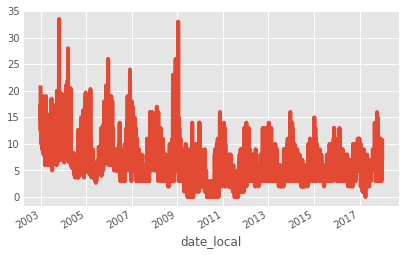

In [6]:
from matplotlib import style
style.use('ggplot')

df_co_Daily['avg_aqi_CO'].plot()

In [7]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_co_Daily['100ma_for_CO'] = df_co_Daily['avg_aqi_CO'].rolling(window=100,min_periods=0).mean()
df_co_Daily.round(2)

df_co_Daily.head(5)

,avg_aqi_CO,100ma_for_CO
date_local,,
2003-01-01,21.0,21.000000
2003-01-02,12.5,16.750000
2003-01-03,16.5,16.666667
2003-01-04,17.0,16.750000
2003-01-05,17.5,16.900000


In [8]:
# ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1,)
# ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# ax1.plot(df_co_Daily.index, df_co_Daily['avg_aqi_CO'])
# ax1.plot(df_co_Daily.index, df_co_Daily['100ma'])

# plt.show()

# Analyze Ozone Daily

In [9]:

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_O3
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_o3_Daily=bq_assistant.query_to_pandas(query)
df_o3_Daily['date_local'] =  pd.to_datetime(df_o3_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_o3_Daily=df_o3_Daily[df_o3_Daily['date_local']>='2003-01-01']

df_o3_Daily.set_index('date_local',inplace=True)

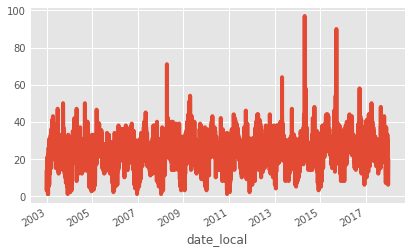

In [10]:
from matplotlib import style
style.use('ggplot')

df_o3_Daily['avg_aqi_O3'].plot()

In [11]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_o3_Daily['100ma_for_Ozone'] = df_o3_Daily['avg_aqi_O3'].rolling(window=100,min_periods=0).mean()
df_o3_Daily.round(2)

df_o3_Daily.head()

,avg_aqi_O3,100ma_for_Ozone
date_local,,
2003-01-01,14.0,14.000000
2003-01-02,3.0,8.500000
2003-01-03,5.0,7.333333
2003-01-04,8.0,7.500000
2003-01-05,13.0,8.600000


# Analyze Nitrogen Dioxide Daily


In [12]:


query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_NO2
    FROM
      `bigquery-public-data.epa_historical_air_quality.no2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_no2_Daily=bq_assistant.query_to_pandas(query)
df_no2_Daily['date_local'] =  pd.to_datetime(df_no2_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_no2_Daily=df_no2_Daily[df_no2_Daily['date_local']>='2003-01-01']

df_no2_Daily.set_index('date_local',inplace=True)

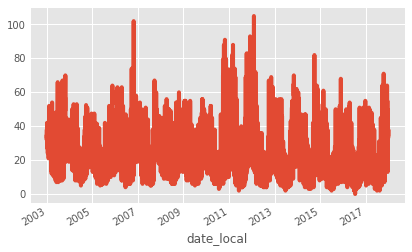

In [13]:
from matplotlib import style
style.use('ggplot')

df_no2_Daily['avg_aqi_NO2'].plot()

In [14]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_no2_Daily['100ma_for_Nitrogen_Dioxide'] = df_no2_Daily['avg_aqi_NO2'].rolling(window=100,min_periods=0).mean()
df_no2_Daily.round(2)

df_no2_Daily.head(5)

,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide
date_local,,
2003-01-01,35.0,35.000000
2003-01-02,32.0,33.500000
2003-01-03,37.0,34.666667
2003-01-04,38.0,35.500000
2003-01-05,33.0,35.000000


# Analyze Sulphur Dioxide Daily

,avg_aqi_SO2,100ma_for_Sulphur_Dioxide
date_local,,
2003-01-01,6.0,6.0
2003-01-02,10.0,8.0
2003-01-03,11.0,9.0
2003-01-04,9.0,9.0
2003-01-05,14.0,10.0


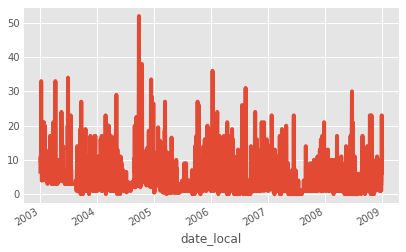

In [15]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_SO2
    FROM
      `bigquery-public-data.epa_historical_air_quality.so2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_so2_Daily=bq_assistant.query_to_pandas(query)
df_so2_Daily['date_local'] =  pd.to_datetime(df_so2_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_so2_Daily=df_so2_Daily[df_so2_Daily['date_local']>='2003-01-01']
df_so2_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_so2_Daily['avg_aqi_SO2'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_so2_Daily['100ma_for_Sulphur_Dioxide'] = df_so2_Daily['avg_aqi_SO2'].rolling(window=100,min_periods=0).mean()
df_so2_Daily.round(2)

df_so2_Daily.head()

# Analyze Particulate Matter Daily

,avg_aqi_pm25,100ma_for_PM25
date_local,,
2003-01-01,65.0,65.000000
2003-01-02,64.0,64.500000
2003-01-03,61.0,63.333333
2003-01-04,60.0,62.500000
2003-01-05,70.0,64.000000


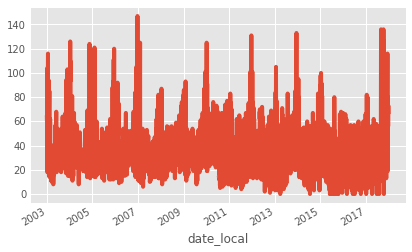

In [16]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_pm25
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm25_frm_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_pm25_Daily=bq_assistant.query_to_pandas(query)
df_pm25_Daily['date_local'] =  pd.to_datetime(df_pm25_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_pm25_Daily=df_pm25_Daily[df_pm25_Daily['date_local']>='2003-01-01']
df_pm25_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_pm25_Daily['avg_aqi_pm25'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_pm25_Daily['100ma_for_PM25'] = df_pm25_Daily['avg_aqi_pm25'].rolling(window=100,min_periods=0).mean()
df_pm25_Daily.round(2)
df_pm25_Daily.head()

# Analyze SF Crime Daily

In [17]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT CAST(timestamp AS DATE) as date_local,count(distinct unique_key) as no_of_incidents
FROM `bigquery-public-data.san_francisco.sfpd_incidents`
group by date_local
order by date_local asc
"""

df_sfcrimes_Daily=bq_assistant.query_to_pandas(query)


In [18]:
df_sfcrimes_Daily['date_local'] =  pd.to_datetime(df_sfcrimes_Daily['date_local'], format='%Y-%m-%d')
df_sfcrimes_Daily=df_sfcrimes_Daily[df_sfcrimes_Daily['date_local']<='2017-12-31']


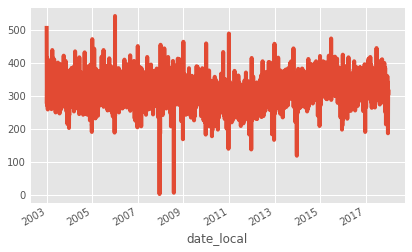

In [19]:
df_sfcrimes_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_sfcrimes_Daily['no_of_incidents'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
# df_sfcrimes_Daily['100ma_for_No_of_Incidents'] = df_sfcrimes_Daily['no_of_incidents'].rolling(window=100,min_periods=0).mean()
# df_sfcrimes_Daily.round(2)

In [20]:
df_sfcrimes_Daily.head()

,no_of_incidents
date_local,
2003-01-01,511
2003-01-02,321
2003-01-03,368
2003-01-04,276
2003-01-05,290


In [21]:
df_co_Daily.shape

(5476, 2)

In [22]:
df_o3_Daily.shape

(5472, 2)

In [23]:
df_no2_Daily.shape

(5465, 2)

In [24]:
df_pm25_Daily.shape

(4153, 2)

In [25]:
df_sfcrimes_Daily.shape

(5478, 1)

In [26]:
## Combine the dataframes ie all
from functools import reduce

df_co_Daily.reset_index(inplace=True)
df_o3_Daily.reset_index(inplace=True)
df_no2_Daily.reset_index(inplace=True)
df_pm25_Daily.reset_index(inplace=True)
df_sfcrimes_Daily.reset_index(inplace=True)

## Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
frames=[df_co_Daily,df_o3_Daily,df_no2_Daily,df_sfcrimes_Daily,df_pm25_Daily]
df_final = reduce(lambda left,right: pd.merge(left,right,on='date_local'), frames)


In [27]:
df_final.columns

Index(['date_local', 'avg_aqi_CO', '100ma_for_CO', 'avg_aqi_O3',
       '100ma_for_Ozone', 'avg_aqi_NO2', '100ma_for_Nitrogen_Dioxide',
       'no_of_incidents', 'avg_aqi_pm25', '100ma_for_PM25'],
      dtype='object')

In [28]:
df_final.head()

,date_local,avg_aqi_CO,100ma_for_CO,avg_aqi_O3,100ma_for_Ozone,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide,no_of_incidents,avg_aqi_pm25,100ma_for_PM25
0,2003-01-01,21.0,21.000000,14.0,14.000000,35.0,35.000000,511,65.0,65.000000
1,2003-01-02,12.5,16.750000,3.0,8.500000,32.0,33.500000,321,64.0,64.500000
2,2003-01-03,16.5,16.666667,5.0,7.333333,37.0,34.666667,368,61.0,63.333333
3,2003-01-04,17.0,16.750000,8.0,7.500000,38.0,35.500000,276,60.0,62.500000
4,2003-01-05,17.5,16.900000,13.0,8.600000,33.0,35.000000,290,70.0,64.000000


In [29]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN',strategy='mean')
df_final["avg_aqi_pm25"]=imp.fit_transform(df_final[["avg_aqi_pm25"]]).ravel()

In [30]:
# ## Optional MinMax Scaling
# from sklearn.preprocessing import MinMaxScaler
# df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']] = MinMaxScaler().fit_transform(df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']])


In [31]:
# ## Optional MinMax Scaling
# from sklearn.preprocessing import StandardScaler
# df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']] = StandardScaler().fit_transform(df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']])
df_final.shape

(4139, 10)

# Finding crimes per capita

In [32]:
import pickle
## Deserialize the pickle object to get back the data frame
picle_in=open('population/dataframe.pickle','rb')
df_pop_per_yr=pickle.load(picle_in)

In [33]:
df_pop_per_yr['year'] = df_pop_per_yr['year'].astype(str).replace('\.0', '', regex=True)

In [34]:
df_final.dtypes

date_local                    datetime64[ns]
avg_aqi_CO                           float64
100ma_for_CO                         float64
avg_aqi_O3                           float64
100ma_for_Ozone                      float64
avg_aqi_NO2                          float64
100ma_for_Nitrogen_Dioxide           float64
no_of_incidents                        int64
avg_aqi_pm25                         float64
100ma_for_PM25                       float64
dtype: object

In [35]:
## Reference https://stackoverflow.com/questions/48295624/extract-year-from-date-column-in-dataframe-having-different-date-format-pyth
df_final['year']=pd.to_datetime(df_final['date_local'], format='%Y-%m-%d').dt.year
df_final['year']=df_final['year'].astype(str)

In [36]:
df_daily=pd.merge(df_final, df_pop_per_yr, how='inner', on='year')

In [37]:
df_daily['Incidents_per_population']=df_daily['no_of_incidents']/df_daily['Population']

In [38]:
df_daily.head()

,date_local,avg_aqi_CO,100ma_for_CO,avg_aqi_O3,100ma_for_Ozone,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide,no_of_incidents,avg_aqi_pm25,100ma_for_PM25,year,Population,Incidents_per_population
0,2003-01-01,21.0,21.000000,14.0,14.000000,35.0,35.000000,511,65.0,65.000000,2003,766160.0,0.000667
1,2003-01-02,12.5,16.750000,3.0,8.500000,32.0,33.500000,321,64.0,64.500000,2003,766160.0,0.000419
2,2003-01-03,16.5,16.666667,5.0,7.333333,37.0,34.666667,368,61.0,63.333333,2003,766160.0,0.000480
3,2003-01-04,17.0,16.750000,8.0,7.500000,38.0,35.500000,276,60.0,62.500000,2003,766160.0,0.000360
4,2003-01-05,17.5,16.900000,13.0,8.600000,33.0,35.000000,290,70.0,64.000000,2003,766160.0,0.000379


In [39]:
# df_daily[['Incidents_per_population']]=MinMaxScaler().fit_transform(df_daily[['Incidents_per_population']])
## Both the x and ys are on same scale now100,000
df_daily['Incidents_per_population']=df_daily['Incidents_per_population']*100000

In [40]:
df_daily.corr()

,avg_aqi_CO,100ma_for_CO,avg_aqi_O3,100ma_for_Ozone,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide,no_of_incidents,avg_aqi_pm25,100ma_for_PM25,Population,Incidents_per_population
avg_aqi_CO,1.000000,0.613241,-0.336453,-0.460031,0.625336,0.354830,0.145066,0.470959,0.271082,-0.338339,0.281010
100ma_for_CO,0.613241,1.000000,-0.102852,-0.558308,0.321383,0.656166,0.120708,0.144264,0.535185,-0.432563,0.295826
avg_aqi_O3,-0.336453,-0.102852,1.000000,0.279724,-0.183101,-0.033078,-0.009325,-0.342926,-0.156769,0.225246,-0.098705
100ma_for_Ozone,-0.460031,-0.558308,0.279724,1.000000,-0.422347,-0.402188,0.017792,-0.222818,-0.621080,0.494467,-0.177510
avg_aqi_NO2,0.625336,0.321383,-0.183101,-0.422347,1.000000,0.433087,0.002463,0.430630,0.297161,-0.245623,0.099583
100ma_for_Nitrogen_Dioxide,0.354830,0.656166,-0.033078,-0.402188,0.433087,1.000000,-0.186099,0.195608,0.637755,-0.332942,-0.050494
no_of_incidents,0.145066,0.120708,-0.009325,0.017792,0.002463,-0.186099,1.000000,-0.023759,-0.136258,0.150916,0.921153
avg_aqi_pm25,0.470959,0.144264,-0.342926,-0.222818,0.430630,0.195608,-0.023759,1.000000,0.286396,-0.152245,0.036975
100ma_for_PM25,0.271082,0.535185,-0.156769,-0.621080,0.297161,0.637755,-0.136258,0.286396,1.000000,-0.440983,0.040652
Population,-0.338339,-0.432563,0.225246,0.494467,-0.245623,-0.332942,0.150916,-0.152245,-0.440983,1.000000,-0.243122


# Study of Target Variable 

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 37.84 and sigma = 4.89



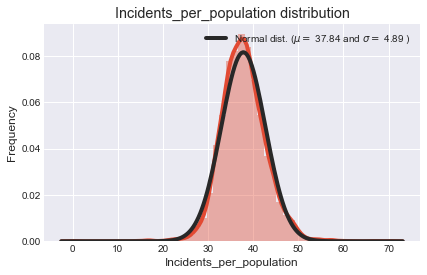

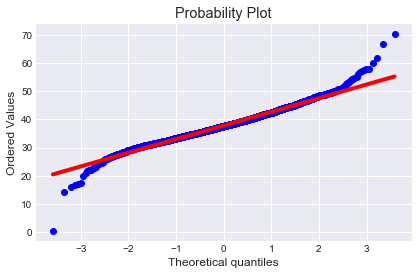

In [41]:
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
sns.set_style('darkgrid')

sns.distplot(df_daily['Incidents_per_population'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_daily['Incidents_per_population'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Incidents_per_population distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_daily['Incidents_per_population'], plot=plt)
plt.show()

# Log-transformation of the target variable




 mu = 3.65 and sigma = 0.14



/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


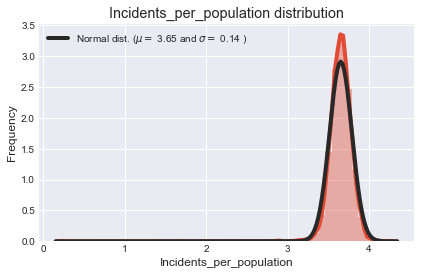

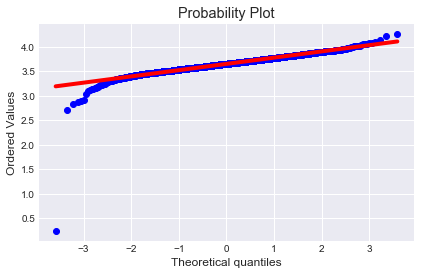

In [42]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_daily["Incidents_per_population"] = np.log1p(df_daily["Incidents_per_population"])

#Check the new distribution 
sns.distplot(df_daily['Incidents_per_population'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_daily['Incidents_per_population'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Incidents_per_population distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_daily['Incidents_per_population'], plot=plt)
plt.show()

In [43]:
##Skewed features

numeric_feats = ['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']

# Check the skew of all numerical features
skewed_feats = df_daily[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
avg_aqi_CO,1.419533
avg_aqi_pm25,0.955325
avg_aqi_NO2,0.643535
avg_aqi_O3,0.162696


In [44]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_daily[feat] = boxcox1p(df_daily[feat], lam)
    

There are 4 skewed numerical features to Box Cox transform


# Regression

In [45]:
# # Log transform the target for official scoring
# # REFER https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
# df_final.no_of_incidents = np.log1p(df_final.no_of_incidents)
df_daily.columns

Index(['date_local', 'avg_aqi_CO', '100ma_for_CO', 'avg_aqi_O3',
       '100ma_for_Ozone', 'avg_aqi_NO2', '100ma_for_Nitrogen_Dioxide',
       'no_of_incidents', 'avg_aqi_pm25', '100ma_for_PM25', 'year',
       'Population', 'Incidents_per_population'],
      dtype='object')

In [46]:
X=df_daily[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']]

In [47]:
Y=df_daily['Incidents_per_population']

In [48]:
Y.head()

0    4.215031
1    3.758808
2    3.892468
3    3.611561
4    3.659736
Name: Incidents_per_population, dtype: float64

In [49]:
X.head()

,avg_aqi_CO,avg_aqi_O3,avg_aqi_pm25,avg_aqi_NO2
0,3.932510,3.340760,5.831328,4.745132
1,3.183845,1.540963,5.802739,4.597157
2,3.574854,2.055642,5.714669,4.838059
3,3.618223,2.602594,5.684507,4.882973
4,3.660579,3.237728,5.968981,4.647709


In [50]:
import statsmodels.api as sm


# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Incidents_per_population   R-squared:                       0.989
Model:                                  OLS   Adj. R-squared:                  0.989
Method:                       Least Squares   F-statistic:                 9.321e+04
Date:                      Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                              00:53:27   Log-Likelihood:                -1896.8
No. Observations:                      4139   AIC:                             3802.
Df Residuals:                          4135   BIC:                             3827.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
avg_aqi_CO       0.2253      0.012     19.389      0.000       0.202       0.248
avg_aqi_O3       0.5259      0.005    101.935      0.000       0.516       0.536
avg_aqi_pm25     0.1718      0.006     29.715      0.000       0.160       0.183
avg_aqi_NO2      0.0499      0.008      6.080      0.000       0.034       0.066
==============================================================================
Omnibus:                      299.367   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1432.876
Skew:                           0.151   Prob(JB):                         0.00
Kurtosis:                       5.867   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Split the Training and Test Set

In [51]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)




(2897, 4) (2897,)
(1242, 4) (1242,)


In [52]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
stdSc = StandardScaler()
X_train.loc[:, numeric_feats] = stdSc.fit_transform(X_train.loc[:, numeric_feats])
X_test.loc[:, numeric_feats] = stdSc.transform(X_test.loc[:, numeric_feats])

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

# Linear Models

## 1. Linear Regression

In [53]:
# Linear Models

## 1. Linear Regression

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print('Accuracy of model=',lm.score(X_test,y_test))

from sklearn import metrics
                               
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))


mods=['Linear_Regression']
vals=[]
## Vals contains rmse for test set
vals.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Accuracy of model= 0.08875108253925301
0.11545011796730913


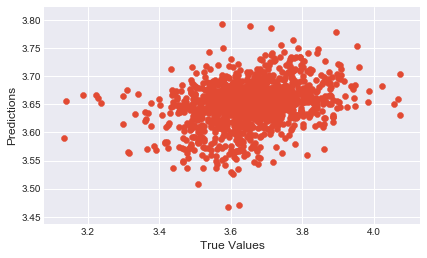

In [54]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## R2 score Evaluation
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)


In [55]:

from sklearn.metrics import r2_score
from sklearn import metrics

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))

print('Rmse VAlue is:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


r2 train: 0.073, test : 0.089
Rmse VAlue is:
0.11545011796730913


## Feature Importance in Linear Regression


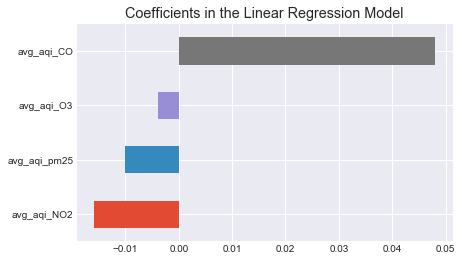

In [56]:
coefs = pd.Series(model.coef_, index = X_train.columns)
imp_coefs = coefs.sort_values().head(10)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Linear Regression Model")
plt.show()


# Regularized Linear Models


In [57]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,ElasticNetCV,Ridge,LassoCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


# 1. Ridge Regression


In [58]:
#Validation function
n_folds = 3

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

0.13785695064057682


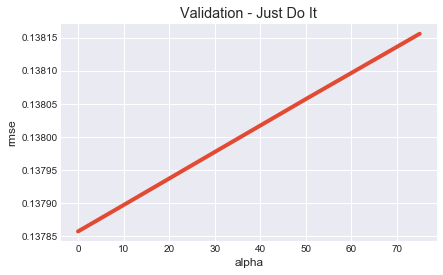

In [59]:
model_ridge = Ridge()
alphas = [0.001,0.005,0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmsle_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

print(cv_ridge.min())


0.11545011685135258


Text(0.5,1,'Coefficients in the Ridge Model')

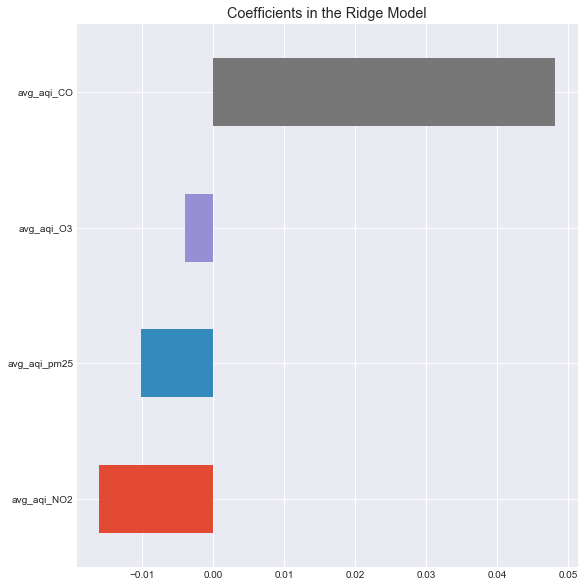

In [60]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## use min alpha
model_ridge=Ridge(alpha=cv_ridge.idxmin())
model_ridge.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_ridge.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mods.append('Ridge Regressor')
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = coef.sort_values().head(10)

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

In [61]:
model_ridge.coef_

array([ 0.04811104, -0.0039053 , -0.0100563 , -0.01592629])

# 2. Lasso Regression


Text(0,0.5,'rmse')

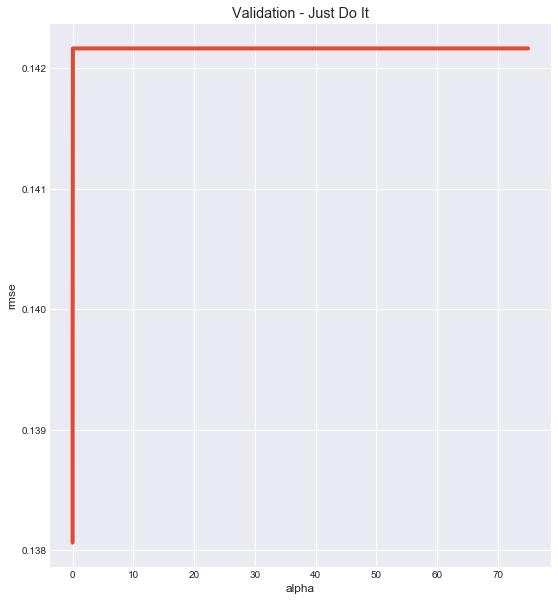

In [62]:

model_lasso = LassoCV()
alphas = [0.001,0.005,0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_lasso = [rmsle_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

0.11533447449311385


Text(0.5,1,'Coefficients in the Lasso Model')

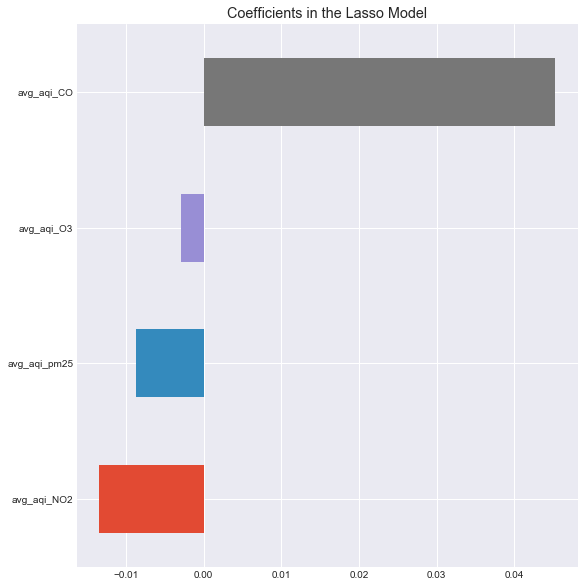

In [63]:

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model_lasso=Lasso(alpha=cv_lasso.idxmin())
model_lasso.fit(X_train, y_train)
##rmsle_cv(model_lasso).min()

# make predictions on the testing set
y_pred = model_lasso.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mods.append('Lasso Regressor')
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

coef = pd.Series(model_lasso.coef_, index = X_train.columns)
imp_coef = coef.sort_values().head(10)
                     
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")


# 3. ElasticNet Regression

In [64]:
model_elastic_net=ElasticNet()
parametersGrid = {"max_iter": [1, 5, 10,100,1000,10000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

grid = GridSearchCV(estimator=model_elastic_net,param_grid=parametersGrid,cv=3,scoring='neg_mean_absolute_error')
grid.fit(X, Y)
print ("best grid params: ", grid.best_params_)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

best grid params:  {'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 100}


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [65]:
grid.best_estimator_

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.0,
      max_iter=100, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.11544979507385271


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5,1,'Coefficients in the ElasticNet Model')

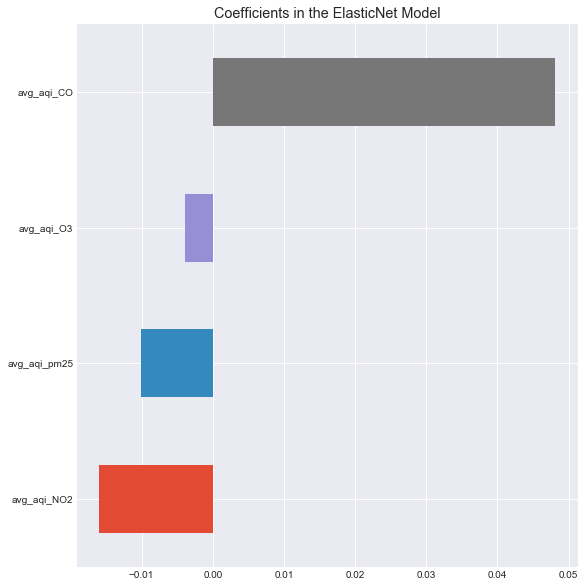

In [66]:

ENet=grid.best_estimator_
ENet.fit(X_train, y_train)
# rmsle_cv(model_lasso).min()
# make predictions on the testing set
y_pred = ENet.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mods.append('ElasticNet Regressor')
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

coef = pd.Series(ENet.coef_, index = X_train.columns)
imp_coef = coef.sort_values().head(10)
                     
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")

# 
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


# XgBoost Regression

In [67]:

# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)], 
        'max_depth': [2,3,4],'n_estimators':[100,300,1000, 2000,3000],
        'learning_rate': [0.01, 0.1, 1.0]}



In [68]:
# # Initialize XGB and GridSearch
# xgb = XGBRegressor(nthread=-1,objective='reg:linear',booster='gblinear') 

# grid = GridSearchCV(xgb, params,cv=3,scoring='neg_mean_absolute_error')
# grid.fit(X, Y)

# print ("best grid params: ", grid.best_params_)


In [69]:
# grid.best_estimator_

# ## XGBRegressor(
#         base_score=0.5, booster='gblinear', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0.3, learning_rate=0.01, max_delta_step=0,
#        max_depth=2, min_child_weight=4, missing=None, n_estimators=100,
#        n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1,objective='reg:linear',booster='gblinear')

1.1641138928135537


Text(0.5,1,'Coefficients in the XgBoost Regression Model')

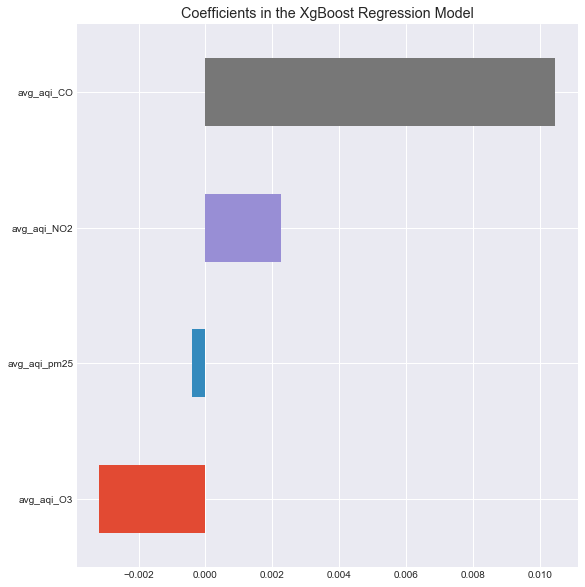

In [70]:

xg_model=XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.01, max_delta_step=0,
       max_depth=2, min_child_weight=4, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


xg_model.fit(X_train, y_train)
# rmsle_cv(model_lasso).min()
# make predictions on the testing set
y_pred = xg_model.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mods.append('XgBoost Regressor')
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

coef = pd.Series(xg_model.coef_, index = X_train.columns)
imp_coef = coef.sort_values().head(10)
                     
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the XgBoost Regression Model")

# 
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


# Compare RMSE of all the 6 models

In [71]:

ser_df=pd.DataFrame({'Model': mods, 'RMSE_VALUE': vals})
ser_df.sort_values(by='RMSE_VALUE', ascending=True,inplace=True)
source = ColumnDataSource(ser_df)

label_type = source.data['Model'].tolist()

p = figure(x_range=label_type, plot_width=1100, plot_height=700)
color_map = factor_cmap(field_name='Model', palette=Spectral6, factors=mods)
p.vbar(x='Model', top='RMSE_VALUE', source=source, width=0.70, color=color_map)

p.title.text ='Comparison of Models'
p.xaxis.axis_label = 'Model Types'
p.yaxis.axis_label = "RMSE value of different models On Test Set"

show(p)

In [72]:
# # Reference https://www.kaggle.com/jasonbenner/ridge-regression-cv-tutorial
# # https://www.kaggle.com/jsaadani/simple-ridge-regression-in-python
# from sklearn.model_selection import GridSearchCV

# solverOptions = (['svd', 'cholesky', 'sparse_cg', 'sag'])
# fit_interceptOptions = ([True, False])
# alphas = np.linspace(0,1,30)
# model = Ridge(normalize=True)

# grid = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas,fit_intercept=fit_interceptOptions,
#                                               solver=solverOptions),cv=3,scoring='neg_mean_absolute_error')
# grid.fit(X_train, y_train)

# print ("best grid params: ", grid.best_params_)



In [73]:
# print('Best score: ',grid.best_score_)

In [74]:
ser_df

,Model,RMSE_VALUE
2,Lasso Regressor,0.115334
3,ElasticNet Regressor,0.115450
1,Ridge Regressor,0.115450
0,Linear_Regression,0.115450
4,XgBoost Regressor,1.164114
